In [47]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Loading data
raw_data = pd.read_excel('FCV&EVMT Data_6.18.19.xlsx')
raw_data.head()

,id. Response ID,submitdate. Date submitted,Month Year[subm...Date submitted],Month[Month Yea...ate submitted]],Year[Month Year...ate submitted]],lastpage. Last page,Carmain,Previous PHEVs,Previous BEVs,Previous HEVs,...,Highest Level of Education,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy"
0,FCV_1_3,2017/06/02 11:30:57,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,1.0,0.0,0.0,...,3.0,483.14,0.0,0.01,2.0,65.0,0.0,2,14622.000000,0.0
1,FCV_1_4,2017/06/02 11:15:39,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,0.0,0.0,1.0,...,4.0,568.09,1.0,10.69,3.0,65.0,0.0,3,9197.142857,0.0
2,FCV_1_2,2017/06/02 10:51:59,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,1.0,1.0,0.0,...,4.0,398.57,0.0,9.39,5.0,55.0,1.0,4,15360.000000,0.0
3,FCV_1_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,FCV_1_15,2017/06/02 19:35:59,06/2017,6.0,2017.0,42.0,2017 Toyota Mirai,1.0,0.0,0.0,...,2.0,255.16,0.0,17.63,2.0,55.0,0.0,3,5082.352941,0.0


In [49]:
# Viewing columns
raw_data.columns

Index(['id. Response ID', 'submitdate. Date submitted',
       'Month Year[subm...Date submitted]',
       'Month[Month Yea...ate submitted]]',
       'Year[Month Year...ate submitted]]', 'lastpage. Last page', 'Carmain',
       'Previous PHEVs', 'Previous BEVs', 'Previous HEVs', 'Previous CNGs',
       'Household Income',
       'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
       'Home ownership (own 1)', 'Home Type (detached 1)',
       'Highest Level of Education', 'Longest trip in the last 12 months',
       'Number of trips over 200 miles in the last 12 months',
       'One-way commute distance', 'Number of people in the household', 'Age',
       'Gender (Male 1)', 'Number of vehicles in the household',
       'Annual VMT Estimate ', 'FCV, BEV Dummy'],
      dtype='object')

In [50]:
# Viewing the columns & datatypes
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27021 entries, 0 to 27020
Data columns (total 25 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   id. Response ID                                                                  27021 non-null  object 
 1   submitdate. Date submitted                                                       20082 non-null  object 
 2   Month Year[subm...Date submitted]                                                20082 non-null  object 
 3   Month[Month Yea...ate submitted]]                                                20082 non-null  float64
 4   Year[Month Year...ate submitted]]                                                20082 non-null  float64
 5   lastpage. Last page                                                              26025 non-null  float64
 6   Carmai

In [51]:
# Dropping all rows with null values 
clean_df = raw_data.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 0 to 19724
Data columns (total 25 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   id. Response ID                                                                  4709 non-null   object 
 1   submitdate. Date submitted                                                       4709 non-null   object 
 2   Month Year[subm...Date submitted]                                                4709 non-null   object 
 3   Month[Month Yea...ate submitted]]                                                4709 non-null   float64
 4   Year[Month Year...ate submitted]]                                                4709 non-null   float64
 5   lastpage. Last page                                                              4709 non-null   float64
 6   Carmain

In [52]:
# Viewing if the test df has duplicated values
clean_df.duplicated().sum()

0

In [82]:
# Viewing the carmain column (how many people owned specific car models)
cars_by_model = clean_df.groupby('Carmain').count()['Highest Level of Education'].sort_values(ascending = False)
cars_by_model[:30]

Carmain
2015 Tesla Model S          502
2017 Chevrolet Bolt EV      498
2015 Nissan Leaf            470
2016 Volkswagen e-Golf      308
2013 Nissan Leaf            305
2016 Nissan Leaf            277
2016 Tesla Model S          254
2013 Tesla Model S          194
2014 Nissan Leaf            144
2017 Toyota Mirai           137
2016 Tesla Model X          136
2014 Tesla Model S           99
2014 Fiat 500e               87
2012 Nissan Leaf             81
2013 Fiat 500e               80
2015 BMW i3                  75
2016 Fiat 500e               75
2017 Nissan Leaf             75
2016 Toyota Mirai            71
2014 Toyota RAV4 EV          67
2014 Chevrolet Spark EV      60
2014 Ford Focus Electric     56
2013 Toyota RAV4 EV          47
2011 Nissan Leaf             46
2014 BMW i3                  43
2012 Tesla Model S           43
2016 FIAT 500e               37
2016 Kia Soul EV             35
2015 Fiat 500e               33
2014 Honda Fit EV            29
Name: Highest Level of Education

In [53]:
# Viewing the age column 
clean_df['Age'].describe()

count    4709.000000
mean       49.643661
std        12.380423
min        18.000000
25%        45.000000
50%        45.000000
75%        55.000000
max        80.000000
Name: Age, dtype: float64

In [54]:
# Viewing the household income column 
clean_df['Household Income'].describe()

count      4709.000000
mean     223311.743470
std      123880.139436
min       50000.000000
25%      125000.000000
50%      175000.000000
75%      275000.000000
max      500000.000000
Name: Household Income, dtype: float64

In [55]:
# Viewing the Previous PHEVs column
clean_df['Previous PHEVs']

0        1.0
1        0.0
4        1.0
5        0.0
7        0.0
        ... 
19708    0.0
19712    0.0
19717    1.0
19723    0.0
19724    0.0
Name: Previous PHEVs, Length: 4709, dtype: float64

In [56]:
# Viewing the importance of emissions column
clean_df['Importance of reducing greenhouse gas emissions (-3 not important, 3 important)'].describe()

count    4709.000000
mean        1.715364
std         1.576913
min        -3.000000
25%         1.240000
50%         2.550000
75%         2.740000
max         3.000000
Name: Importance of reducing greenhouse gas emissions (-3 not important, 3 important), dtype: float64

In [57]:
# Commute Distance
clean_df['One-way commute distance'].describe()

count    4709.000000
mean       18.578486
std        40.951945
min         0.000000
25%         6.680000
50%        14.000000
75%        23.710000
max      2381.910000
Name: One-way commute distance, dtype: float64

(-20.0, 1000.0)

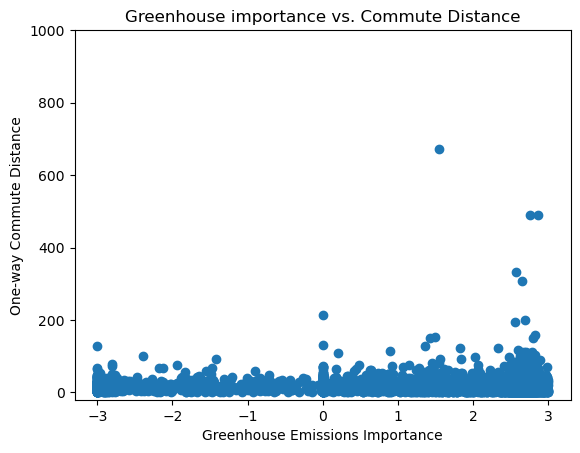

In [60]:
# Defining axes
x_axis = test['Importance of reducing greenhouse gas emissions (-3 not important, 3 important)'].values
y_axis = test['One-way commute distance'].values

# Plotting data
plt.scatter(x_axis, y_axis)
plt.title('Greenhouse importance vs. Commute Distance')
plt.ylabel('One-way Commute Distance')
plt.xlabel('Greenhouse Emissions Importance')
plt.ylim(-20, 1000)

### -3 corresponds to the consumer not caring about greenhouse emissions, while +3 corresponds to the consumer caring a lot about greenhouse emissions

(-20.0, 1000.0)

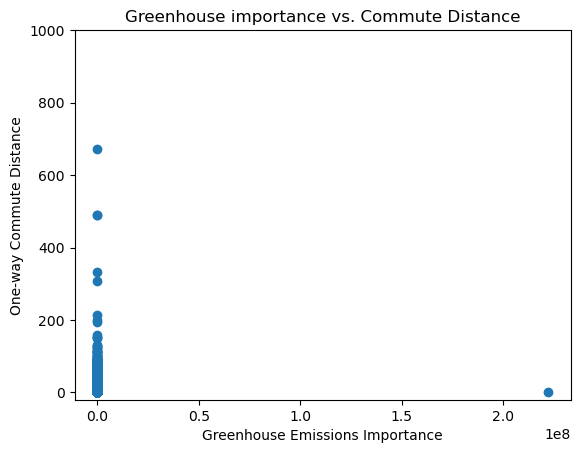

In [83]:
# Defining axes
x_axis = test['Number of trips over 200 miles in the last 12 months'].values
y_axis = test['One-way commute distance'].values

# Plotting data
plt.scatter(x_axis, y_axis)
plt.title('Greenhouse importance vs. Commute Distance')
plt.ylabel('One-way Commute Distance')
plt.xlabel('Greenhouse Emissions Importance')
plt.ylim(-20, 1000)